In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
import warnings

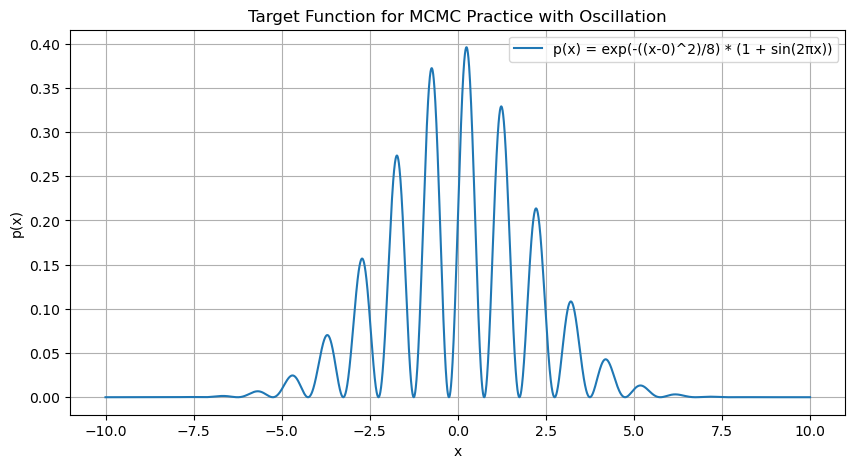

In [298]:
# Define parameters for the target function
mu = 0
sigma = 2
omega = 2 * np.pi

# Define the target function
x = np.linspace(-10, 10, 4000)
p_x = np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) * (1 + np.sin(omega * x))

# Normalize p_x to make it a proper probability density function
p_x /= np.trapz(p_x, x)

# Plot the target function
plt.figure(figsize = (10, 5))
plt.plot(x, p_x, label='p(x) = exp(-((x-0)^2)/8) * (1 + sin(2πx))')
plt.title('Target Function for MCMC Practice with Oscillation')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True)
plt.legend()
plt.show()

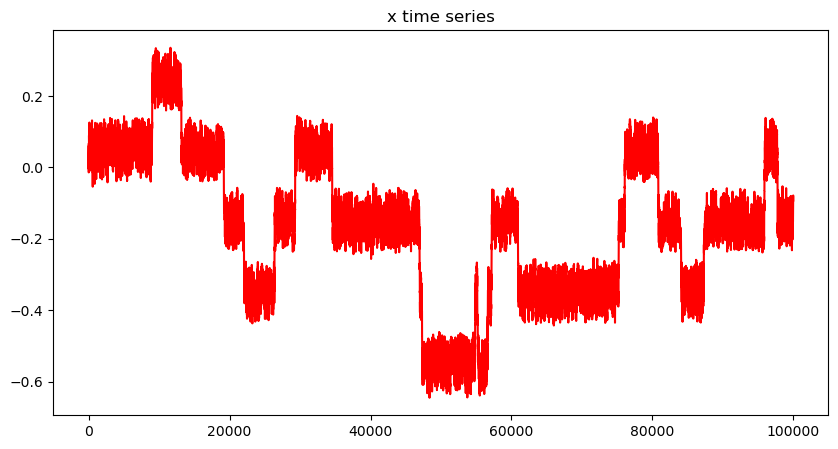

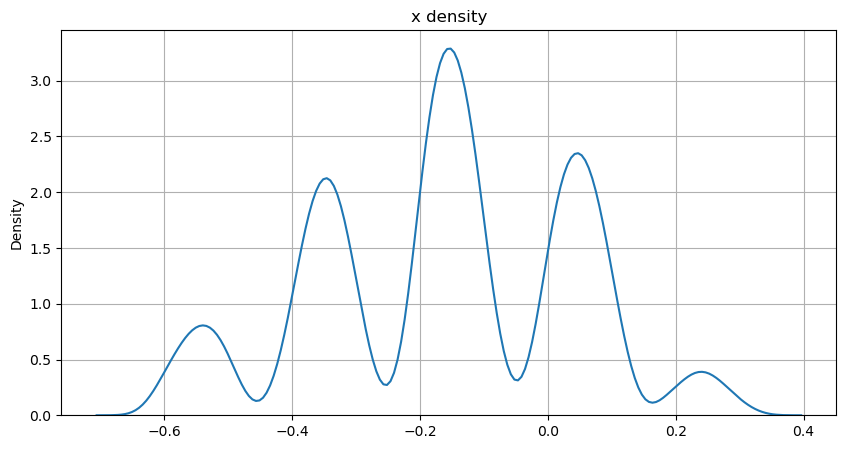

In [294]:
warnings.filterwarnings('ignore')

# Generate x1
x1 = 0
x = [x1]
acceptance_num = 0
n = 100000

def target(x, y):
    mu = 0
    sigma = 0.01
    omega = 10 * np.pi
    
    return np.exp(-((x - y) ** 2) / (2 * sigma ** 2)) * (1 + np.sin(omega * x))
    
for t in range(0, n):
    # generate yt from q(yt | xt_1)
    y = np.random.normal(x[t], tau)
    
    # calculate acceptance rate
    alpha = min(np.log(target(y, x[t])) - np.log(target(x[t], y)), 0)

    # generate u from uniform distribution
    u = np.log(np.random.uniform(0, 1))

    # u < alpha
    if u < alpha:
        xt = y
        x.append(xt)
        acceptance_num += 1
        
    # otherwise
    else:
        xt = x[t]
        x.append(xt)
        
plt.figure(figsize = (10, 5))
plt.title('x time series')
plt.plot(x, 'r')
plt.show()

plt.figure(figsize = (10, 5))
plt.title('x density')
sns.kdeplot(x)
plt.grid(True)
plt.show()

In [299]:
acceptance_rate = 100 * acceptance_num / n
print('Acceptance Rate: ', round(acceptance_rate, 3), '%')

Acceptance Rate:  92.113 %


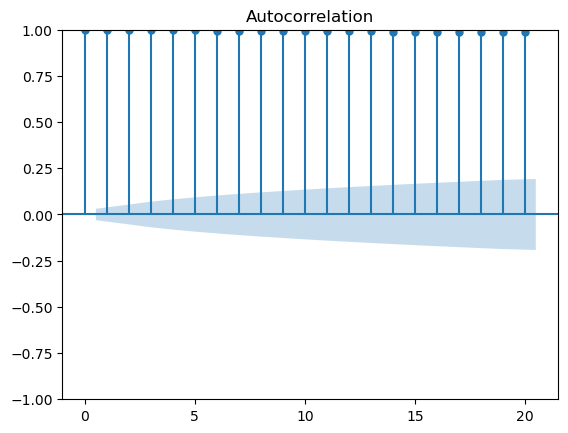

In [300]:
plot_acf(np.array(x), lags = 20)
plt.savefig('ACF', transparent=True)
plt.show()